# feature selection using random forest

https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f

## Import Libraries

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

## Load the datasets

In [50]:
df = pd.read_csv('./train.csv')
df.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0.0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0.0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2.0,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1.0,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0.0,NaN,NaN


## EDA

### Extract Numerical features

In [51]:
numerical_features = df.select_dtypes(['int32', 'int64', 'float64', 'float32'])
df_copy = numerical_features
df_copy.head()

,ID,target,v1,v2,v4,v5,v6,v7,v8,v9,...,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,...,0.803572,8.000000,1.989780,0.035754,1.804126,3.113719,2.024285,0.0,0.636365,2.857144
1,4,1,NaN,NaN,NaN,9.191265,NaN,NaN,2.301630,NaN,...,NaN,NaN,NaN,0.598896,NaN,NaN,1.957825,0.0,NaN,NaN
2,5,1,0.943877,5.310079,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,...,2.238806,9.333333,2.477596,0.013452,1.773709,3.922193,1.120468,2.0,0.883118,1.176472
3,6,1,0.797415,8.304757,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,...,1.956521,7.018256,1.812795,0.002267,1.415230,2.954381,1.990847,1.0,1.677108,1.034483
4,8,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


### Dependent and Independent features

In [52]:
X = df_copy.drop(['ID', 'target'], axis=1) # independent features
X.head()

,v1,v2,v4,v5,v6,v7,v8,v9,v10,v11,...,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
0,1.335739,8.727474,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,0.503281,16.434108,...,0.803572,8.000000,1.989780,0.035754,1.804126,3.113719,2.024285,0.0,0.636365,2.857144
1,NaN,NaN,NaN,9.191265,NaN,NaN,2.301630,NaN,1.312910,NaN,...,NaN,NaN,NaN,0.598896,NaN,NaN,1.957825,0.0,NaN,NaN
2,0.943877,5.310079,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,0.765864,14.756098,...,2.238806,9.333333,2.477596,0.013452,1.773709,3.922193,1.120468,2.0,0.883118,1.176472
3,0.797415,8.304757,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,6.542669,16.347483,...,1.956521,7.018256,1.812795,0.002267,1.415230,2.954381,1.990847,1.0,1.677108,1.034483
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.050328,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [53]:
y = df_copy[['target']] # dependent features
y.head()

,target
0,1
1,1
2,1
3,1
4,1


### Split data into training and test set

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [55]:
X_train.head()

,v1,v2,v4,v5,v6,v7,v8,v9,v10,v11,...,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
25829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.028447,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
8426,6.772266e-07,9.572387,5.778202,10.020819,2.361685,2.122214,2.473885,5.201239,0.700220,16.417910,...,2.060845,4.705883,2.081274,2.051069,1.426402,3.266928,2.718551,0.0,1.229572,-9.536802e-08
43342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.312911,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
62158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.838075,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
64981,1.241989e+00,4.961969,3.863564,7.780767,2.551113,2.276473,0.149144,11.470588,2.603938,15.214286,...,2.567115,8.882354,2.495622,0.027717,1.399023,5.321179,1.505988,1.0,1.683645,1.401273e+00


## Impute Missing values in training data

In [56]:
X_train.isnull().sum()

v1      30008
v2      29987
v4      29987
v5      29333
v6      30008
        ...  
v127    30008
v128    29333
v129        0
v130    30016
v131    30047
Length: 112, dtype: int64

### Check for outliers in training dataset

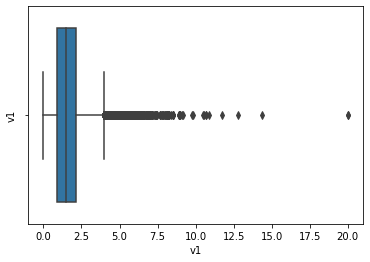

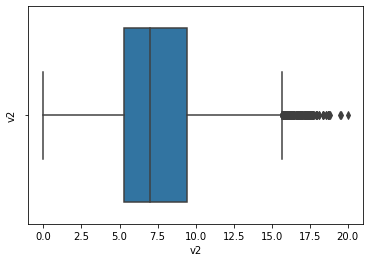

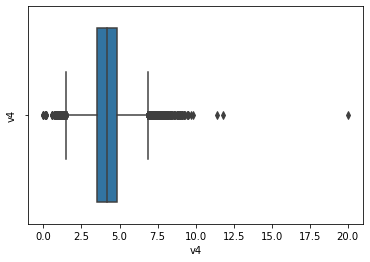

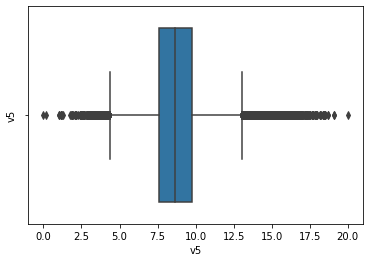

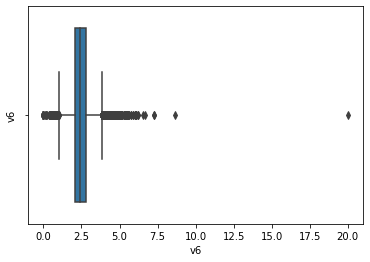

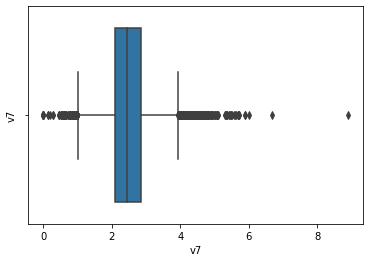

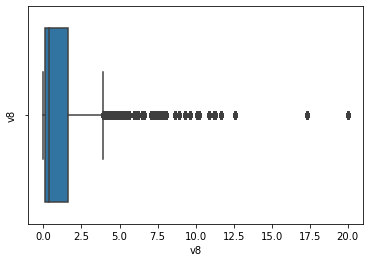

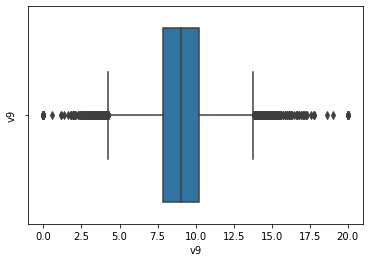

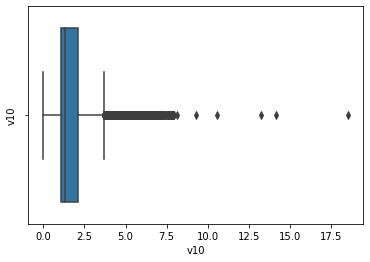

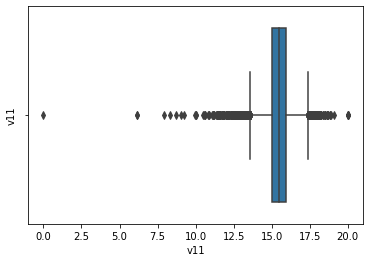

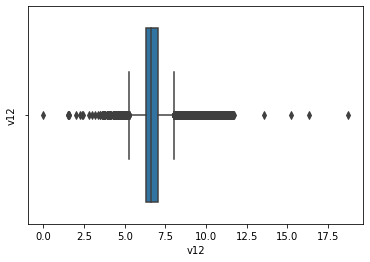

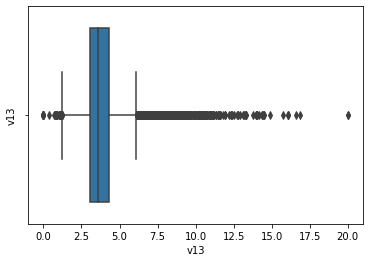

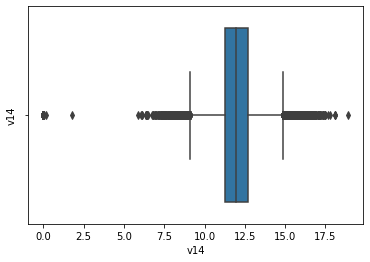

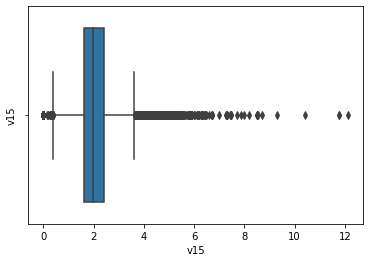

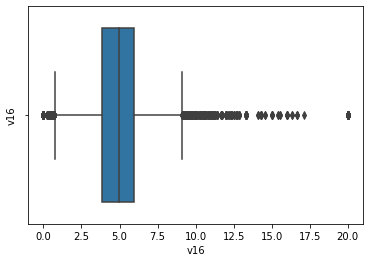

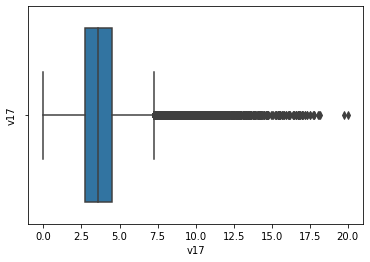

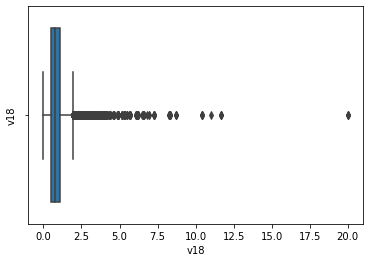

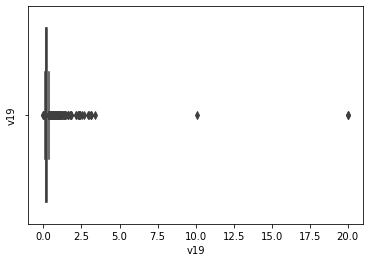

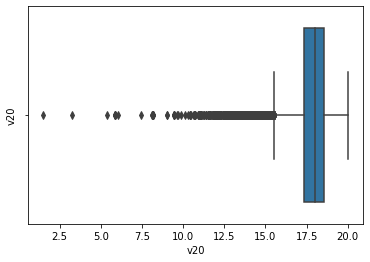

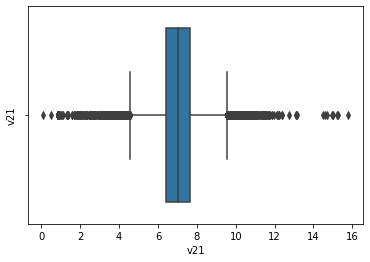

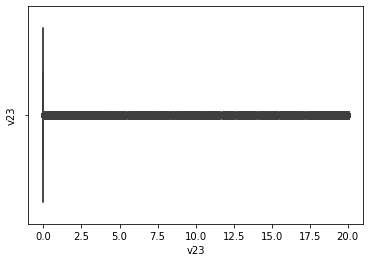

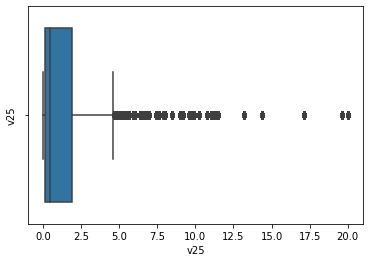

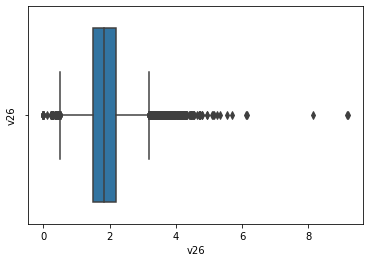

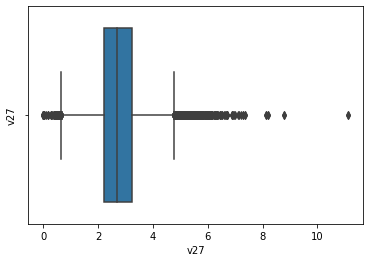

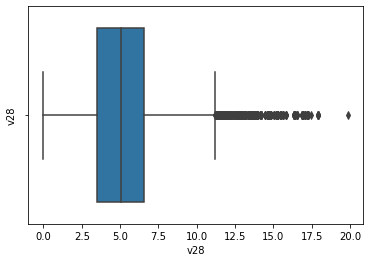

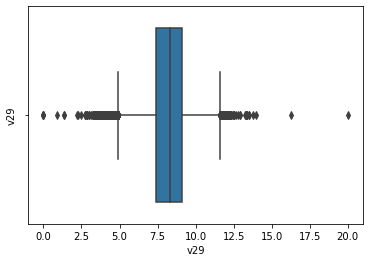

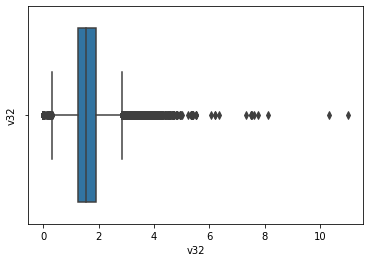

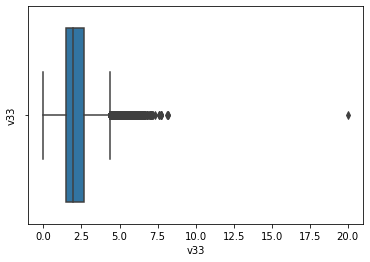

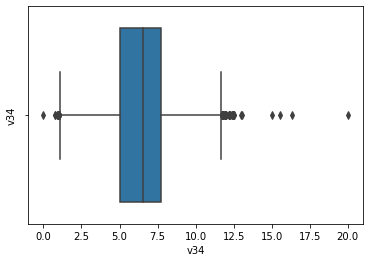

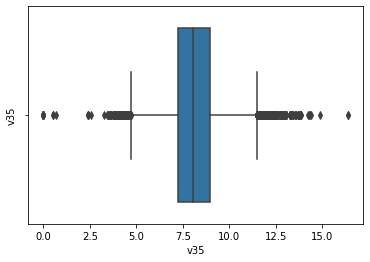

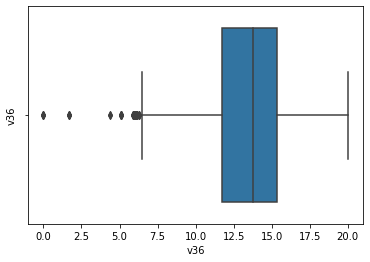

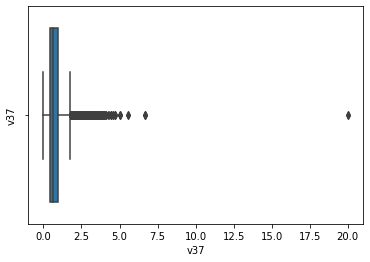

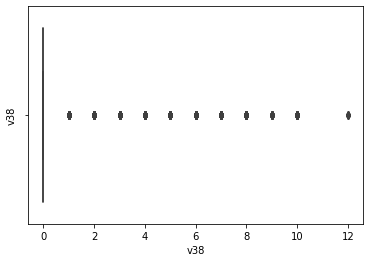

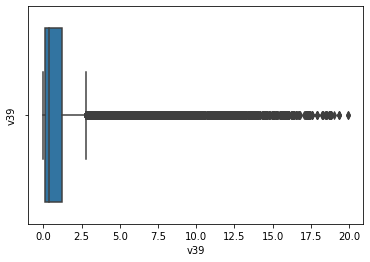

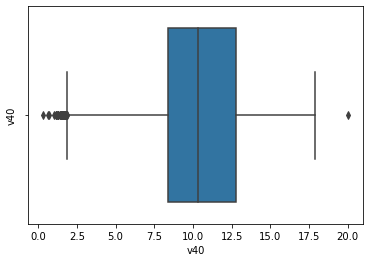

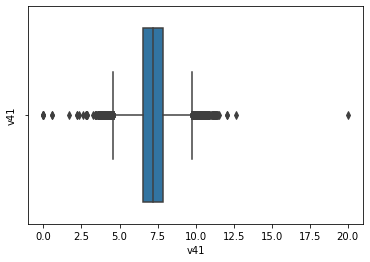

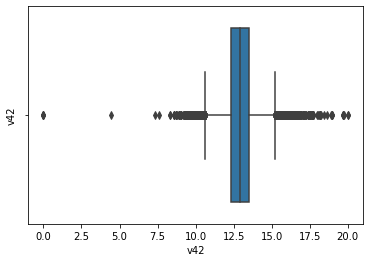

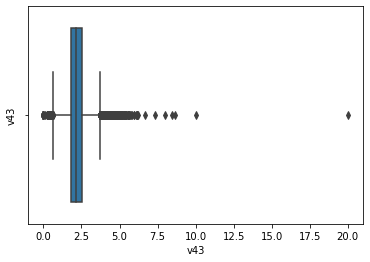

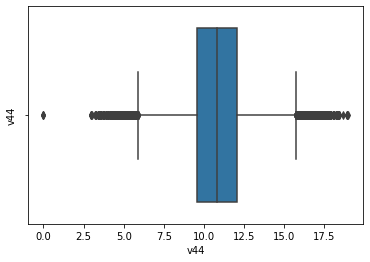

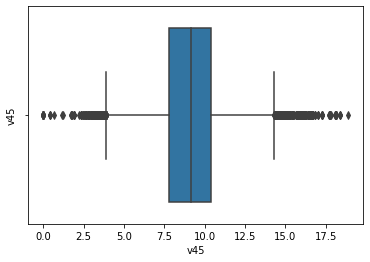

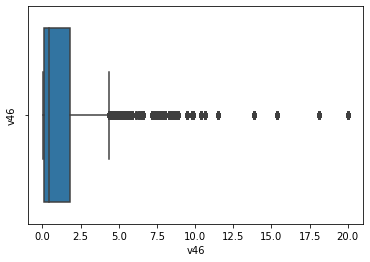

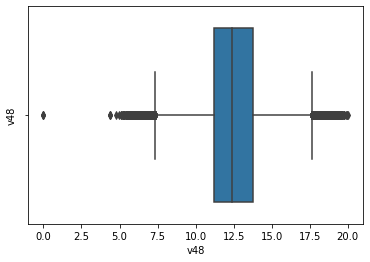

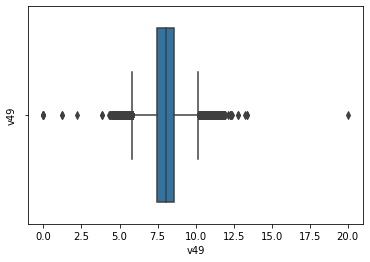

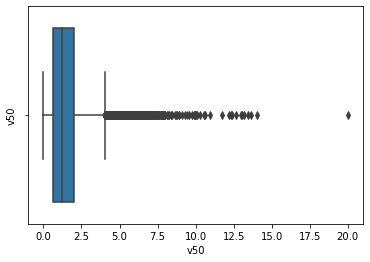

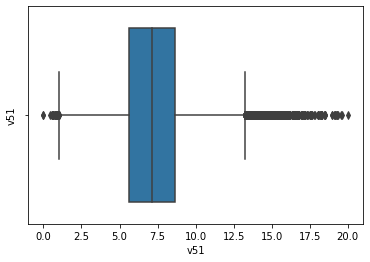

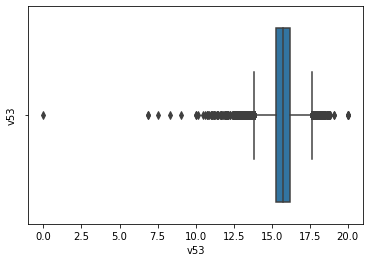

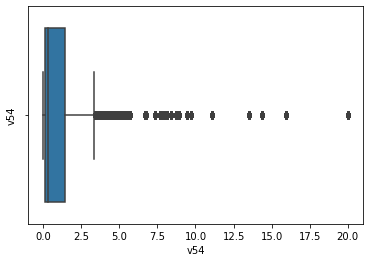

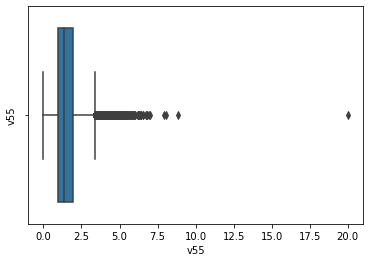

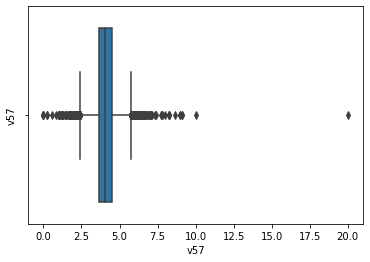

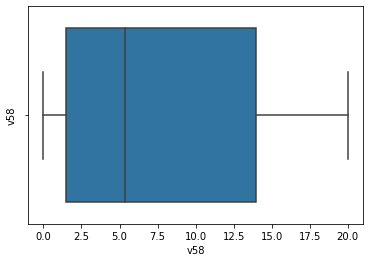

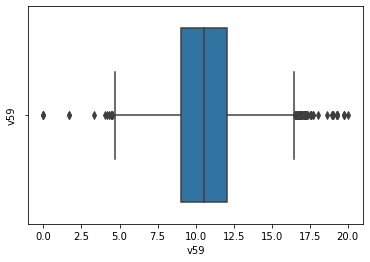

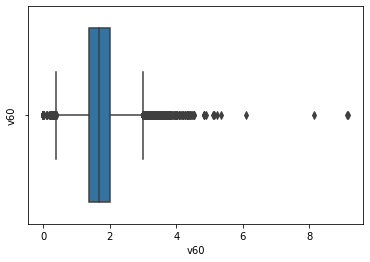

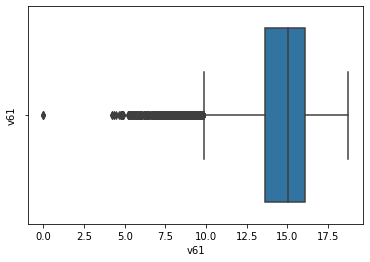

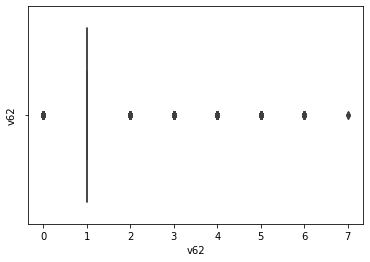

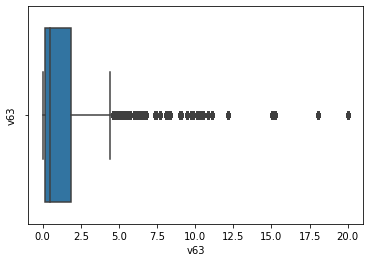

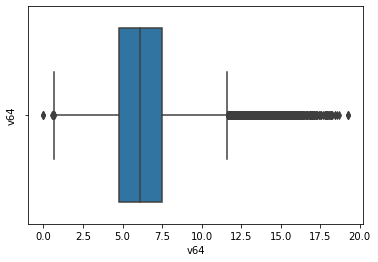

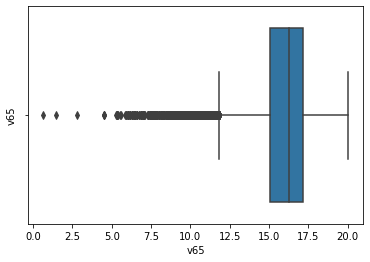

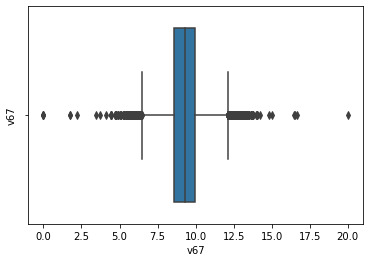

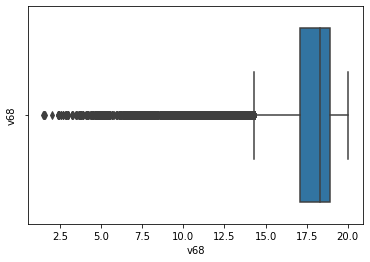

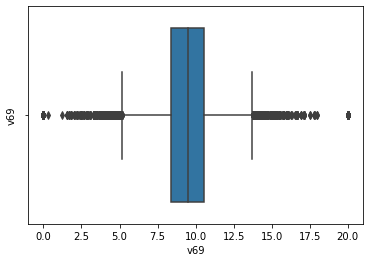

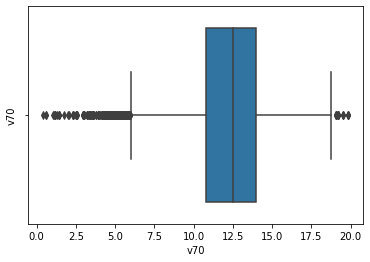

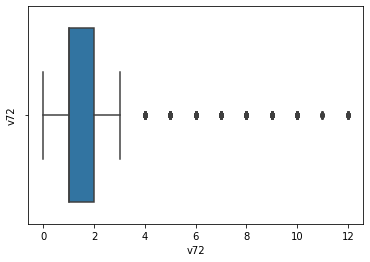

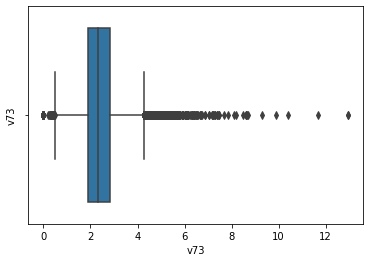

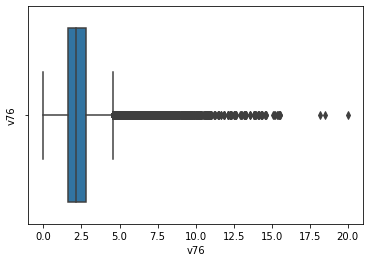

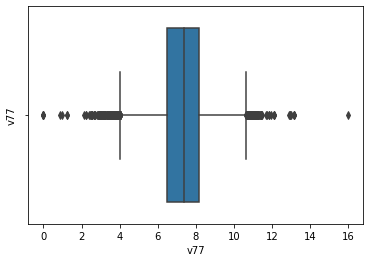

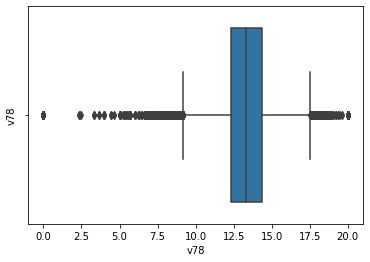

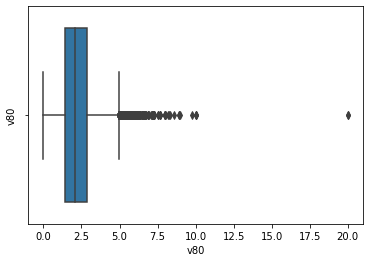

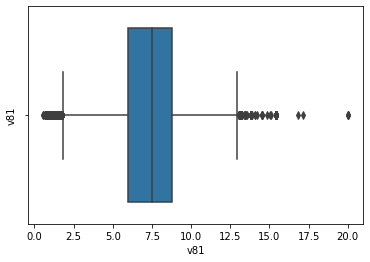

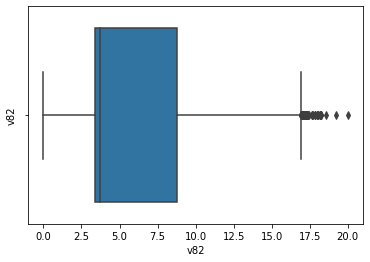

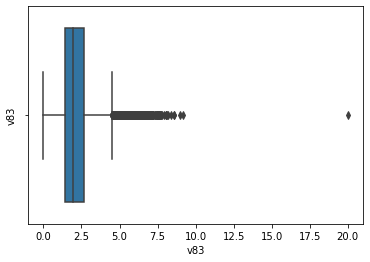

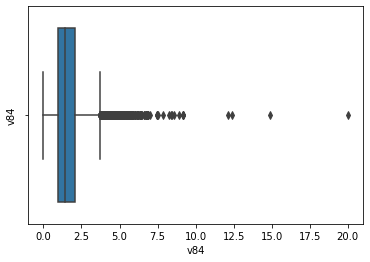

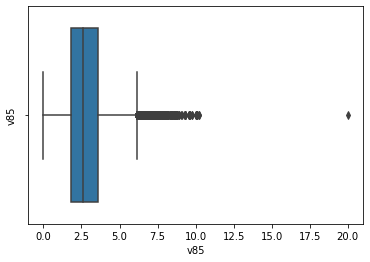

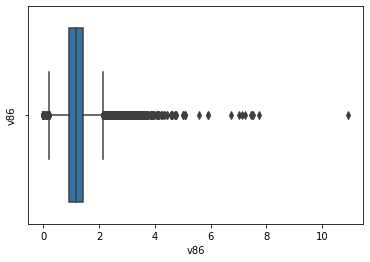

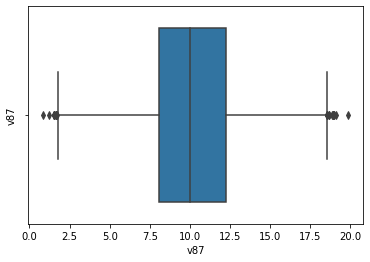

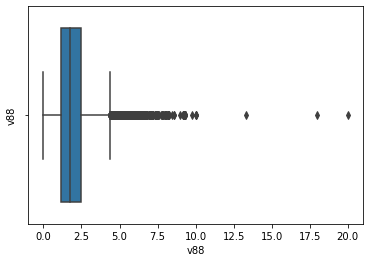

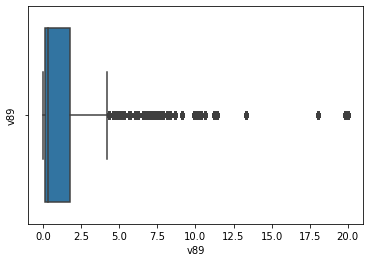

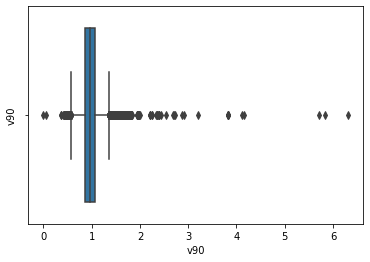

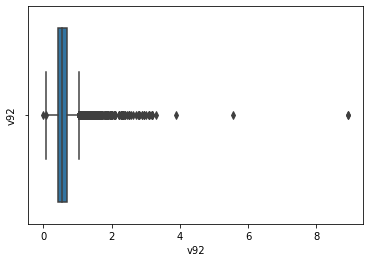

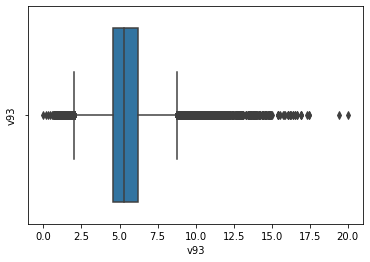

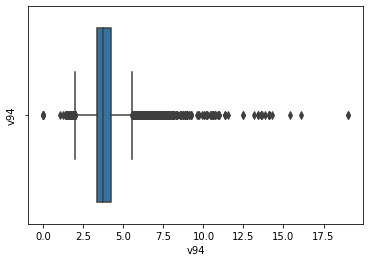

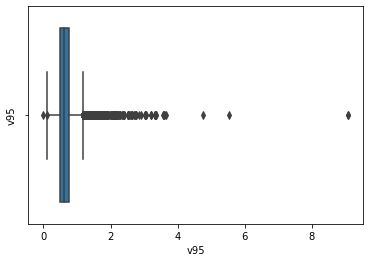

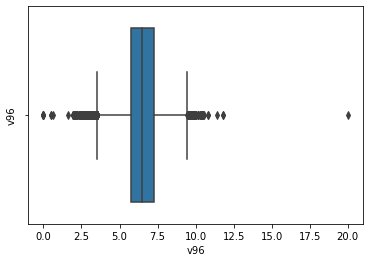

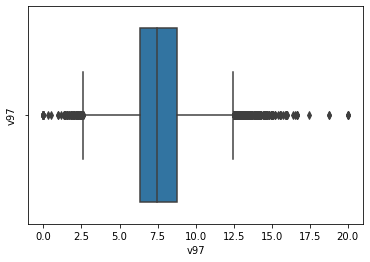

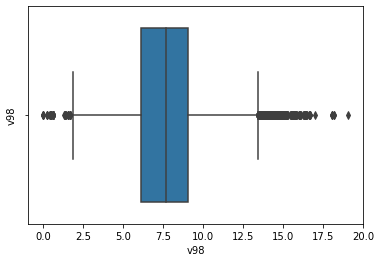

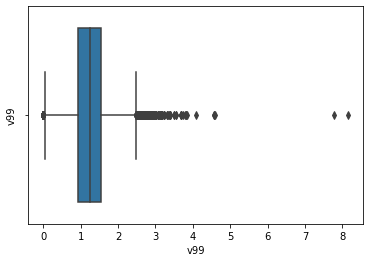

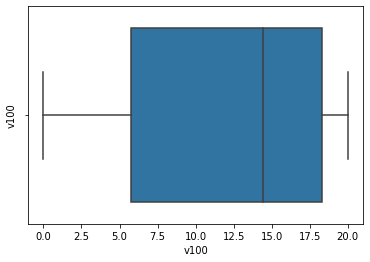

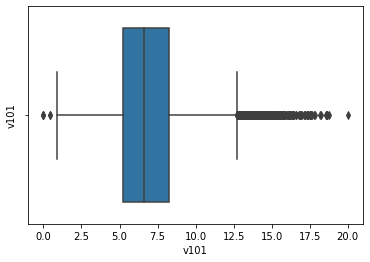

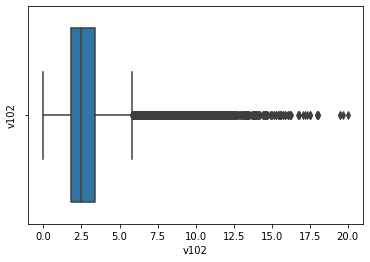

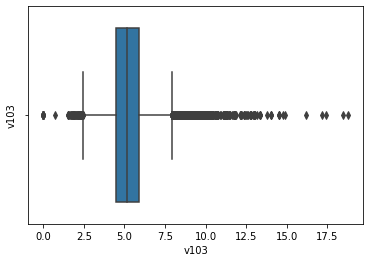

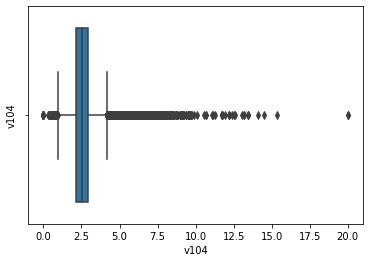

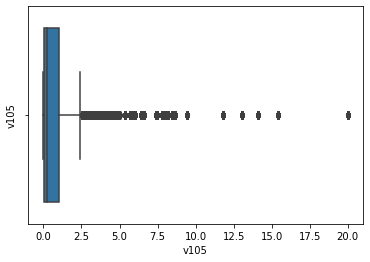

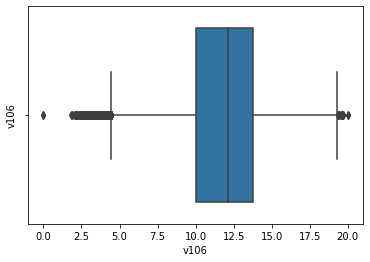

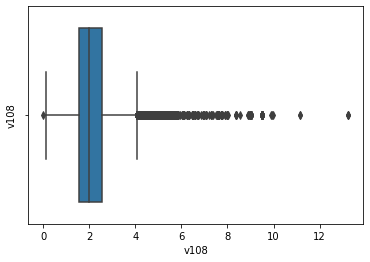

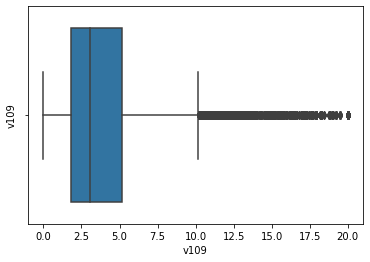

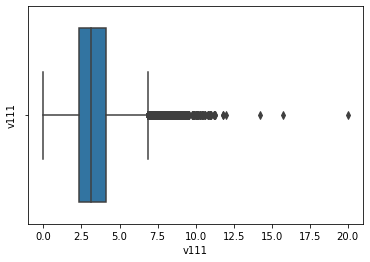

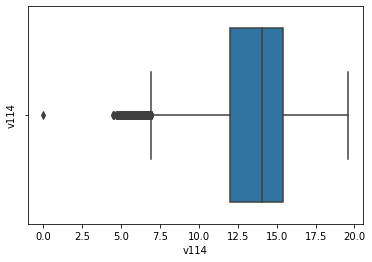

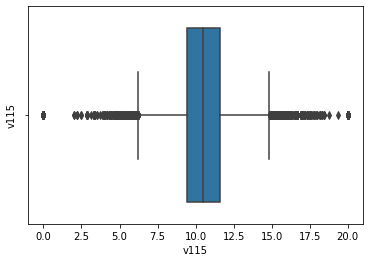

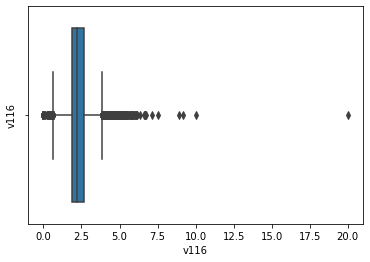

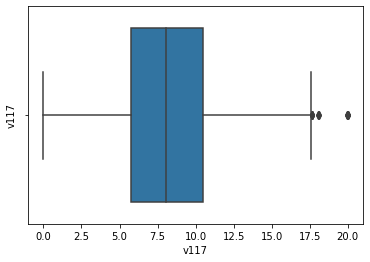

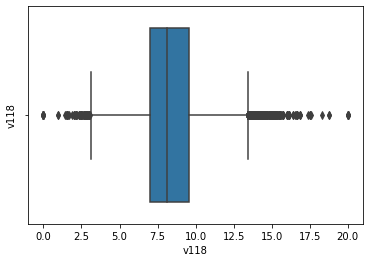

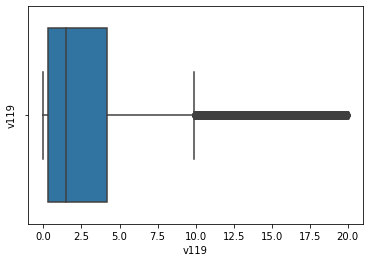

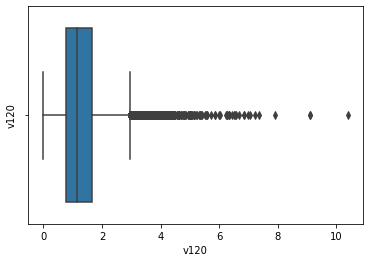

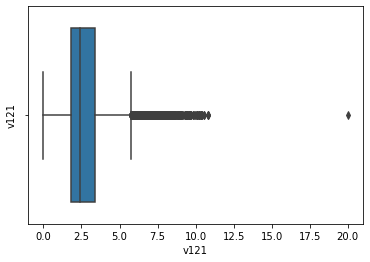

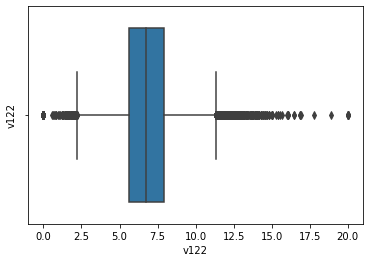

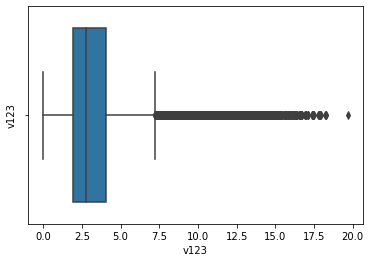

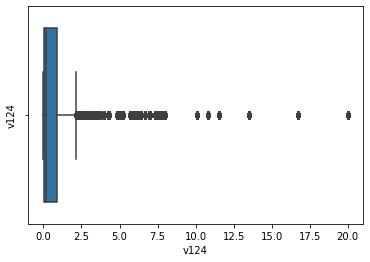

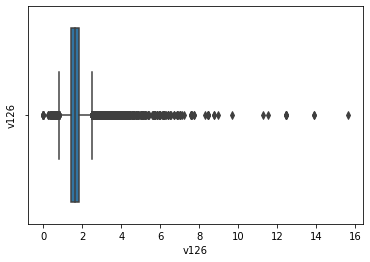

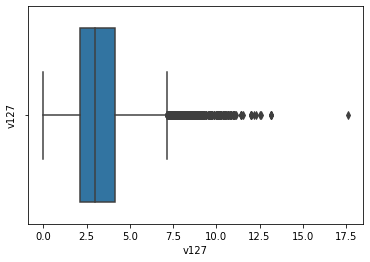

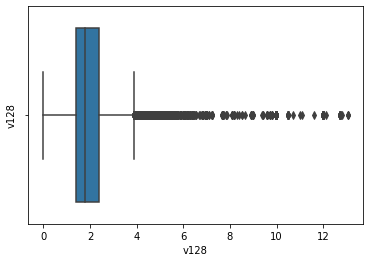

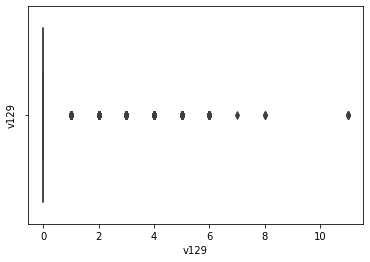

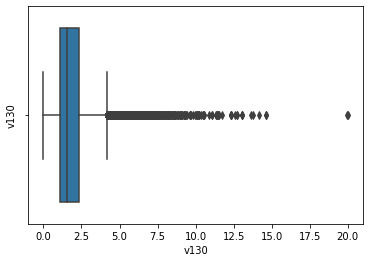

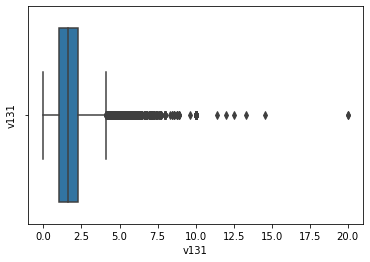

In [57]:
for feature in X_train:
  sns.boxplot(x = X_train[feature])
  plt.xlabel(feature)
  plt.ylabel(feature)
  plt.show()


**Inference**

Outliers exits in training set. So we use median to impute the missing values.

### Use median to impute missing values

In [58]:
for feature in X_train:
    X_train[feature].fillna(
    np.round(X_train[feature].median(), 
             decimals=2), 
    inplace=True)

In [59]:
X_train.isnull().sum()

v1      0
v2      0
v4      0
v5      0
v6      0
       ..
v127    0
v128    0
v129    0
v130    0
v131    0
Length: 112, dtype: int64

**Inference:**

No more missing values

## Scaling the data using Standard Scalar

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
scalar=StandardScaler()

In [62]:
scalar.fit(X_train)

StandardScaler()

## Apply Feature Selection Using Random Forest

In [63]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

- Firstly, specify the random forest instance, indicating the number of trees.
- Use selectFromModel object from sklearn to automatically select the features.

In [64]:
sel_ = SelectFromModel(RandomForestClassifier(n_estimators=100))
sel_.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_from_model.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


SelectFromModel(estimator=RandomForestClassifier())

### View important features

In [65]:
sel_.get_support()

array([False, False, False, False, False, False, False, False,  True,
       False,  True, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False])

**Inference:**

Here True basically indicates that the feature is important and should be selected. False indicates that the feature is not important and can be skipped.

### Make a list of selected features

In [68]:
selected_features = X_train.columns[(sel_.get_support())]
print('selected features: {}'.format(len(selected_features)))
print(f'Total fetuares: {X_train.shape[1]}')

selected features: 10
Total fetuares: 112


**Inference:**

Out of 112 features, 10 features are only important and selected.